## Decision Tree - Classification


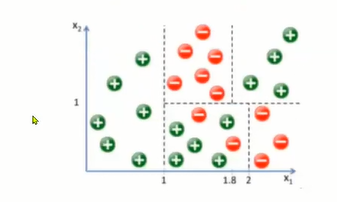

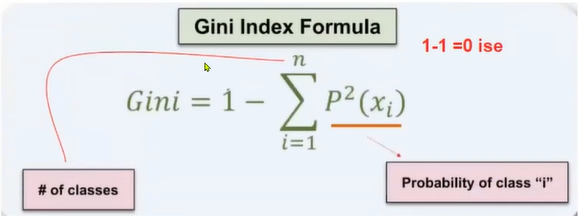

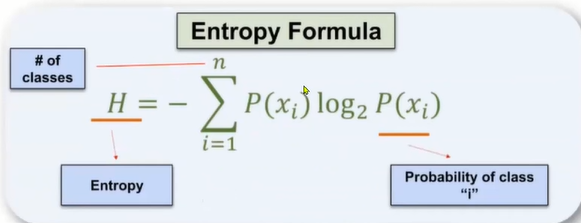

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Techproed DS/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
10/344  # bunu sex deki missing valuenun yuzdesini bulmak icin yazdik


0.029069767441860465

In [8]:
df = df.dropna()
# burada EDA ile ugrasmayacagimiz icin nan degerlerimi drop ederek devam ediyorum

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [11]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [13]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [14]:
df[df["sex"]== "."] # cinsiyetteki "." olan satırı düzeltilmesi

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [15]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [16]:
df.loc[336, "sex"] = "MALE"

In [17]:
df.loc[336, "sex"]

'MALE'

yukarida 336 ya male dedik cunku yukarida degerlere baktik max vs kiyasladik ve olculerinin erkek olculeri icinde old na karar verdik

## Visualization

In [18]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

dataya baktik, imbalanced olma durumu soz konusu olabilir. Data sayisi azsa yuzdelik olarak bunu degerlendirmek de yararli olabilir. Ancak burasi bir fikir verse de datamizin balanced ya da imbalanced olup olmadigina modele soktuktan sonra karar verecegiz. 

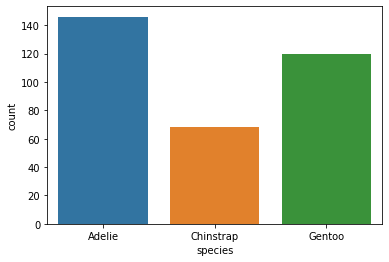

In [19]:
sns.countplot(x="species", data = df);
plt.show()

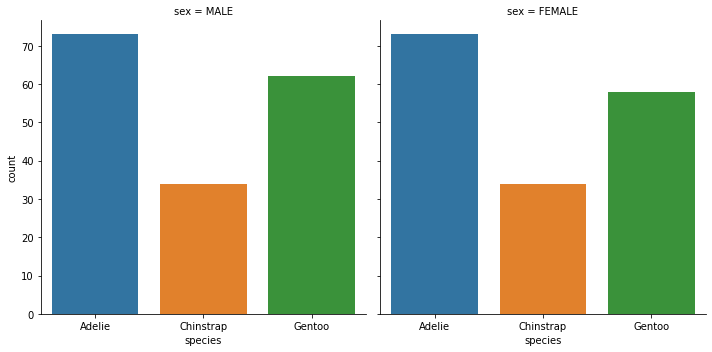

In [20]:
sns.catplot(x='species', data=df, kind='count',col='sex')
plt.show() # categoric uniqe 

<Figure size 864x432 with 0 Axes>

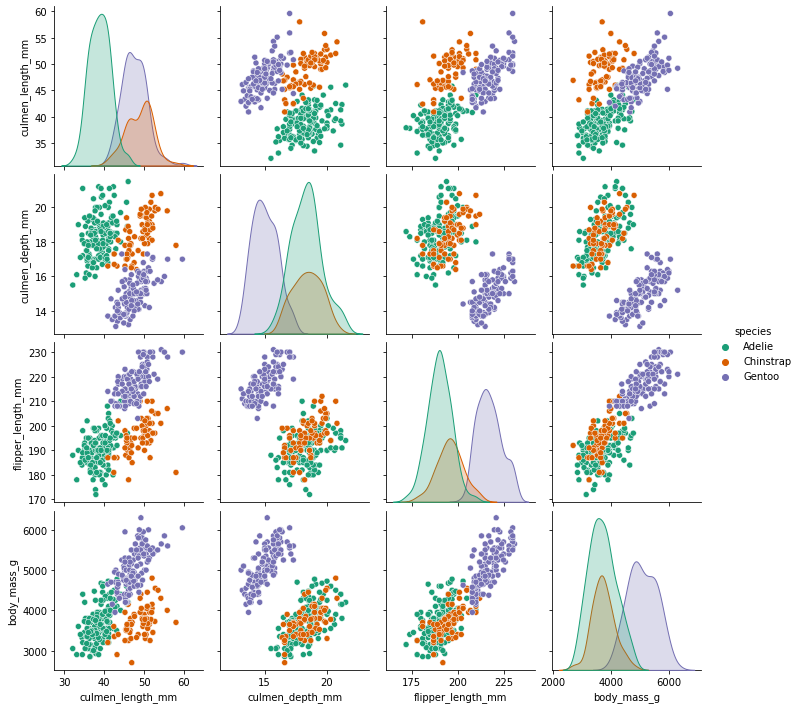

In [23]:
plt.figure(figsize=(12,6));
sns.pairplot(df,hue='species',palette='Dark2');
plt.show()

In [24]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
!pip install plotly


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


maksimum 3 featuremize (3d olduğundan) bu şekilde de bakabiliyoruz.

In [25]:
import plotly.express as px  # 3 d grafik

In [26]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

In [27]:
df.select_dtypes("number")# numeric veriler

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


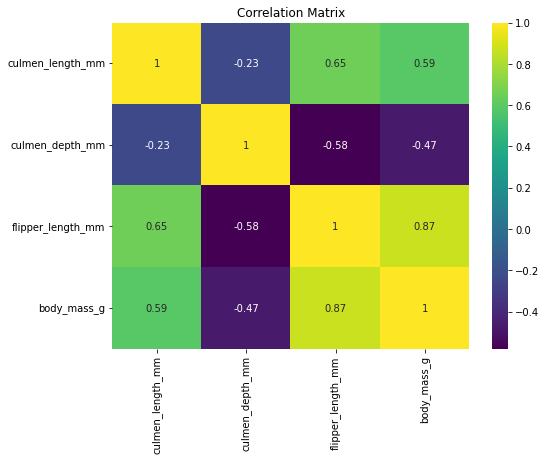

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

Eger multicollinearity olsaydi bile bizim icin yine de decision tree kullanirken sorun degildi cunku tree based modeller non-parametric dedigimiz testler uyguluyor, bu sebeple en onemli feature i secerek multicollinearity i de arka planda hallediyor. 

## Feature Engineering

In [29]:
df.drop("species", axis =1)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [30]:
pd.get_dummies(df.drop("species", axis =1), drop_first =True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train | Test Split

In [31]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

* Normalde diger modellerde biz train-test split asamasindan sonra scaling islemi yapiyorduk ancak tree based modellerde bunun yapilmasi tavsiye edilmiyor. Cunku datayi scale edersek manipule olabilir, halbuki decision tree basarili bir sekilde sectigi featurelara bagli olarak clasification yapabiliyor.
* Burada scale islemi uygulamayacagimiz icin pipeline a da gerek yok.
* Decision tree de diger modellere oranla overfitting gorulme olasiligi daha yuksektir cunku bias eklemezseniz train datasini %100 bilir fakat test datasinda overfite gider. 
* Scale yapmadigimiz icin dogal olarak transform da yapmiyoruz.

# Modelling - Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
DT_model = DecisionTreeClassifier(random_state=101)

In [36]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [37]:
y_pred = DT_model.predict(X_test)

## Model Performance on Classification Tasks

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [39]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

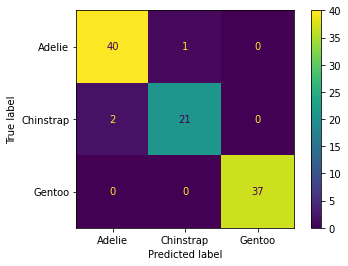

In [40]:
plot_confusion_matrix(DT_model,X_test,y_test)
plt.show()

# model adelie 40 doğru TP,  1 FN hata
# cinstraptan 21 doğru 2 hata
# gento 37 doğru 0 hata

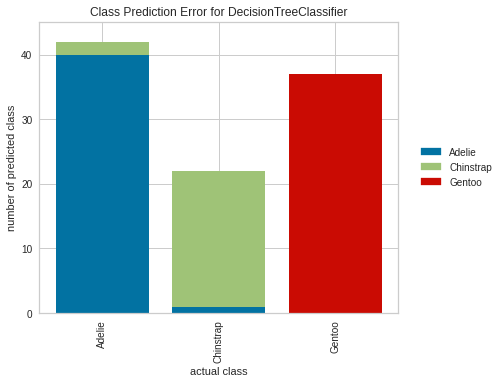

In [41]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

# yukarıdaki heatmap'in farklı grafiğinin yorumlanması gibi hataların hangi sınıfa ait olduğunu veriyor 

Yukaridaki yellowbrick grafiginde yapilan dogru ve yanlis tahminlerin gorsellestirilmis halini gormus oluyoruz. 

In [42]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)
#train setinde overfit gibi duruyor fakat test seti değerleri dengeli oldğu için overfitten bahsedemeiz

Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



* Train ve test setimizin scorelari birbirleri ile uyumlu old icin datanin dengeli old nu ve overfittingden bahsedemeyecegimizi goruyoruz. 
* 2'den fazla class imiz old nda yani multiclass old nda bize weighted, macro ve accuracy scorelarini donduruyor. 

## Cross Validate

In [43]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [44]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.005314,0.005299,0.958333,0.958333,0.958333,0.958333
2,0.002908,0.005633,0.958333,0.958333,0.958333,0.958333
3,0.002832,0.003974,0.916667,0.916667,0.916667,0.916667
4,0.002995,0.004016,0.956522,0.956522,0.956522,0.956522
5,0.002771,0.003863,1.000000,1.000000,1.000000,1.000000
6,0.002886,0.004771,1.000000,1.000000,1.000000,1.000000
7,0.002737,0.003728,1.000000,1.000000,1.000000,1.000000
8,0.002596,0.003783,1.000000,1.000000,1.000000,1.000000
9,0.002653,0.003891,0.869565,0.869565,0.869565,0.869565
10,0.002585,0.003710,1.000000,1.000000,1.000000,1.000000


In [45]:
df_scores.mean()[2:] 

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

modeli sifirlayip tum scorelarin micro degerlerini ayri ayri cagirdik ve hepsinin accuracy ile ayni oldnu gorduk yani accuracy nin micro degerlerle esit oldnu ispatladik.

## Feature Importances

In [46]:
DT_model.feature_importances_  

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

Yukarida bize featurelarin yuzdelik olarak scorelarini gosteriyor. Bu featurelarin neler old nu gormek icin de asagidaki kod blogunu calistiriyoruz. 

In [47]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
culmen_depth_mm,0.052893
island_Dream,0.078360
culmen_length_mm,0.325918
flipper_length_mm,0.542829


Yukarida feature importance a baktigimizda %90'a yakin bir tahmini flipper_length_mm ile culmen_length_mm sayesinde yaptigini bize gosteriyor. Bu importance oranlari target feature imizi tahmin etme gucu aslinda. Burada yuzdelik olarak 0 importance gorunenleri ise lassodaki gibi modelin yok saydigini goruyoruz. Bu yuzden %0 olarak aldigi featurelardan gelecek insightlari decision tree nin kacirma durumu soz konusu. 
> Multicollinearity sorunu ozellikle continious verilerde karsimiza cikan bir sorun. Bunu su sekilde de dusunebiliriz, mesela kisi verisi var elimizde ve 3 feature da da kisinin ismi sorulmus, biz burada 2'sini dusurup 1'i ile devam ederiz cunku tek feature bizim isimizi goruyor. Tabiki gercek dunya verilerinde hemen multicollinearity var o zaman dusurelim demiyoruz. Scorelarimizi alip onlara bir bakiyoruz. Scorelarimizda bir dengesizlik varsa o zaman dusurmeyi dusunebiliriz. Linear modellerde multicollinearity i kontrol etmistik cunku Linear Model'de multicollinearity i handle edecek bir sistem calismiyor. Ancak diger modellerin hepsinin arkasinda handle edecek bir sistem var. O yuzden multicollinearity sorununu diger modellerde cok dert etmiyoruz. 

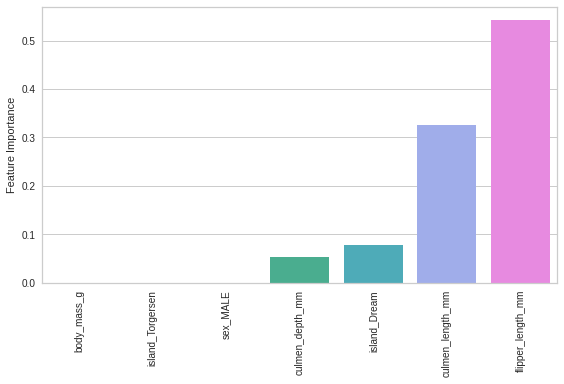

In [48]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Drop most important feature

Modelim tahminlerinin onemli bir kismini "flipper_length_mm" ile yaptigi icin, her zaman biz boyle tahminlerimizi yuksek derecede etkileyen feature i cikararak tekrar modelin nasil calistigini ve bu feature in modelimizi olumlu mu yoksa olumsuz mu etkiledigini gozlemlemeliyiz. 

In [49]:
X2 = X.drop(columns = ["flipper_length_mm"]) 

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [51]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [52]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [53]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



Scorelar arasinda gayet guzel bir uyum soz konusu old nu goruyoruz. 

In [54]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.005770,0.004212,1.000000,1.000000,1.000000,1.000000
2,0.002959,0.004000,1.000000,1.000000,1.000000,1.000000
3,0.002991,0.003890,0.958333,0.958333,0.958333,0.958333
4,0.002773,0.003941,1.000000,1.000000,1.000000,1.000000
5,0.002642,0.003743,1.000000,1.000000,1.000000,1.000000
6,0.003254,0.004331,1.000000,1.000000,1.000000,1.000000
7,0.002905,0.003711,1.000000,1.000000,1.000000,1.000000
8,0.002580,0.004158,1.000000,1.000000,1.000000,1.000000
9,0.002532,0.003721,1.000000,1.000000,1.000000,1.000000
10,0.002509,0.003742,0.956522,0.956522,0.956522,0.956522


In [ ]:
df_scores.mean()[2:] 

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

### Bu sebeple DT de en önemli featuremizi düşürüp birde öyle bakalım skorlar nasıl

In [55]:
from sklearn.metrics import make_scorer

#her bir gözlem için ayrı ayrı skorlara bakmak için make_scorer ile oluştururuz.

In [56]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }

Multiclass datalarda scorelari ayri ayri goremedigimiz icin gormek istersek diye bu sekilde manuel olarak kod yazdik.

In [57]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

## Visualize the Tree

In [58]:
from sklearn.tree import plot_tree

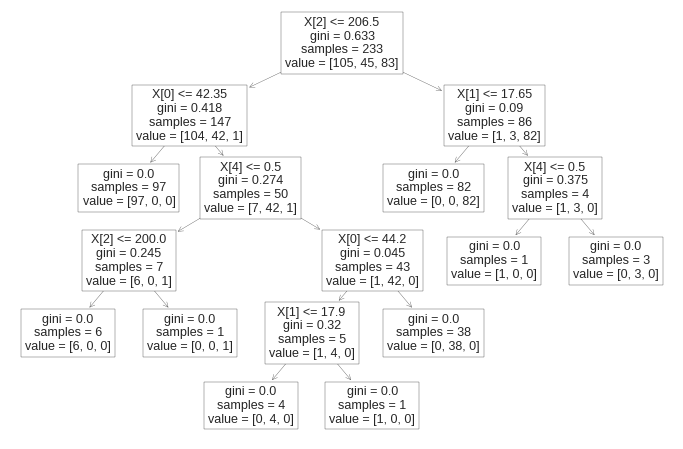

In [59]:
plt.figure(figsize=(12,8))
plot_tree(DT_model);
plt.show()

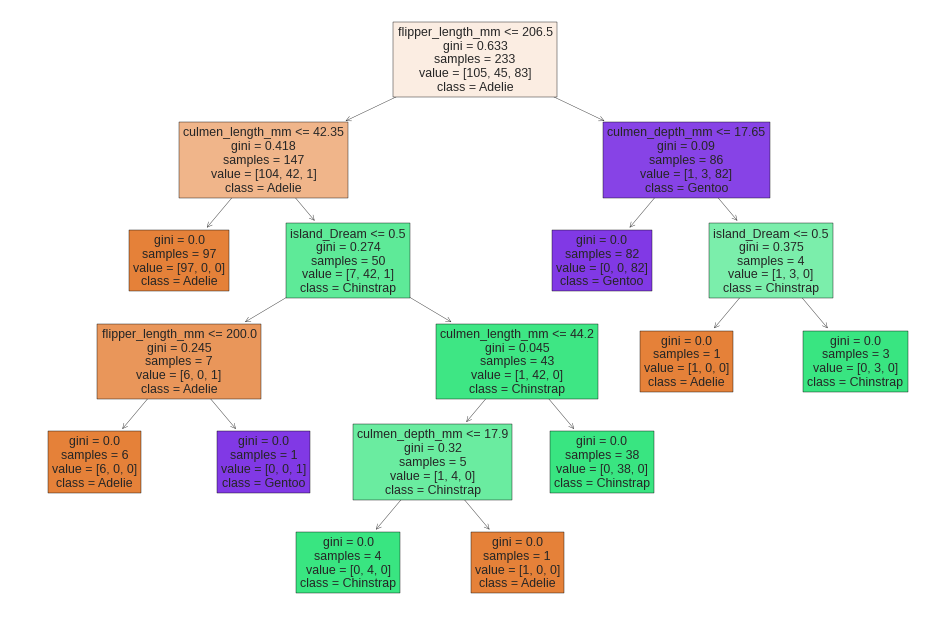

In [60]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());
plt.show()

* Modelin hedefi gini yi minimize etmek, 0 yapmak. Bu yuzden son dalda gininin 0 old nu goruyoruz.
* Ayrica value listesinde gordugumuz buyuk olan rakam class a adini veriyor. 
* Modelim 0 hata ile yani 0 gini ile tamamlandigi icin bu model bizi overfitting e goturur\goturebilir. Asagida alacagimiz scorelarda bunu gorecegiz. 

## Understanding Hyperparameters

### Max depth, min samples split, min samples leaf

In [61]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

In [62]:
pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=101)

max_depth = katman sayisi



Test Set
[[36  5  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101



Train Set
[[97  8  0]
 [ 0 45  0]
 [ 0  1 82]]


              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96       105
   Chinstrap       0.83      1.00      0.91        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.96       233
   macro avg       0.94      0.97      0.95       233
weighted avg       0.97      0.96      0.96       233



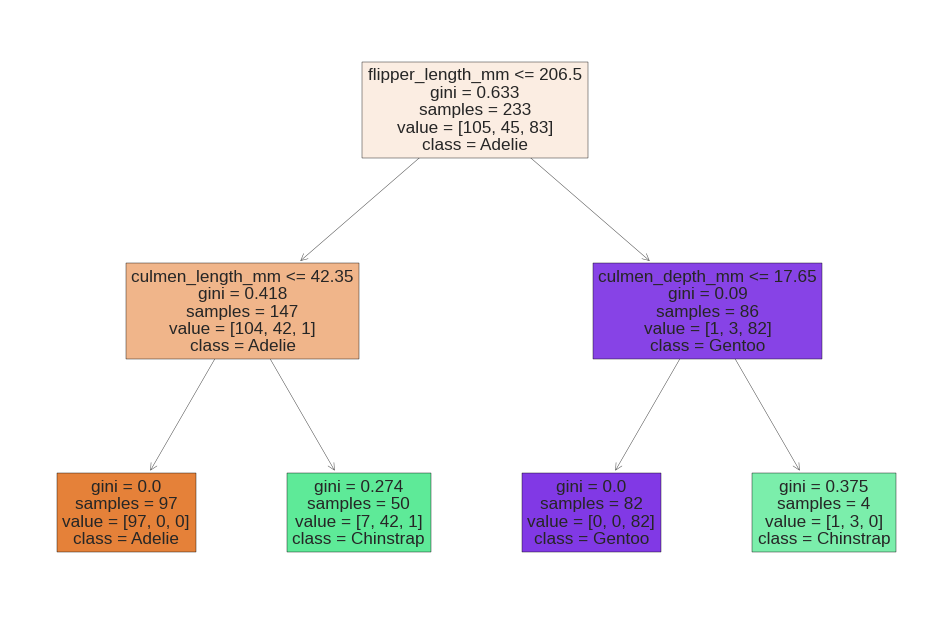

In [63]:
report_model(pruned_tree,)

Yukaridaki scorelara baktigimizda birbirleri ile uyumlu old nu goruyoruz. max_depth'in defaultu none, bu yuzden de sonuna kadar goturuyor agaci. Biz max_depth e 2 dedik bu yuzden de 2 katman cikardi bize. Agacin baslangic noktasi "root node", root node un ayrildigi ilk alan 1. katman, digeri ise 2. katman. max_depth ile biz aslinda overfitting ile mucadele etmis oluyoruz. Bu yuzden parametrelerimizin en onemlisi max_depth cunku overfitting ile ilk mucadelemizi max_depth ile yapiyoruz. Cunku default degeri normalde hata olusturmuyor, fakat overfitting yaratiyor. Biz ise overfittingi yenmek icin max_depth ile biraz hata yani bias eklemis oluyoruz. 

DecisionTreeClassifier'in diger parametrelerinden incelemeye devam ediyoruz. 
* min_samples_split: defaultu 2, bir yapragin bolunmeye devam edebilmesi icin gerekli olan gozlem sayisini verir. Yani o sayida gozlem(sample) yoksa yaprak bolunmeye devam edemiyor. 
* min_samples_leaf: default degeri 1, bir yapragin yaprak olarak kabul edilebilmesi icin gerekli olan minimum gozlem sayisidir. 

### Max Leaf Nodes

In [66]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=6, random_state=101,)
pruned_tree_2.fit(X_train,y_train)

#Max Leaf Nodes == en sonda kalan leaf yaprak sayısını ayarlar


DecisionTreeClassifier(max_leaf_nodes=6, random_state=101)



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[103   2   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99       105
   Chinstrap       0.96      1.00      0.98        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           0.99       233
   macro avg       0.99      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



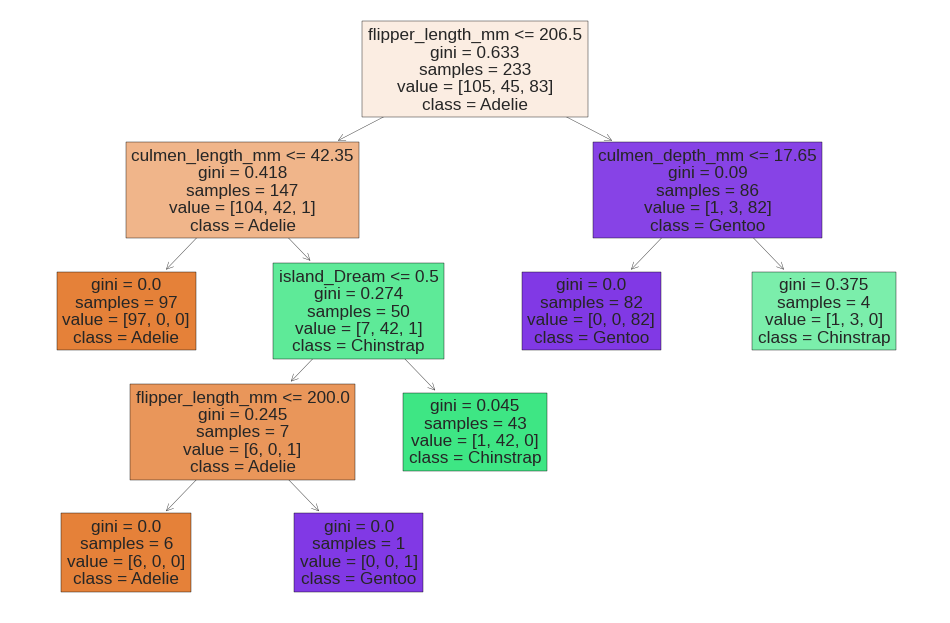

In [67]:
report_model(pruned_tree_2)

max_leaf_nodes parametresine 6 girdigim icin finalize olan son yapraklari 6 yaprak olarak sinirladi. 

## Criterion

Bizim bir bolme kriterimiz vardi, gini ya da entropy katsayisina gore datamiz bolunuyordu. 
* Bir bolgede eksi ve arti sayilari esitse (notebookun basindaki gini gorselindeki - ve + lari yani iki farkli sinifi ornek vererek bunu konustuk) entropy=1 cikar. Eger bir bolgede sadece - ya da sadece + class i varsa yani tamamini dogru bilmisse entropy=0 cikar. 
* criterion'un default degeri gini dir. Biz bu sefer entropy e gore bakmak istedik bu yuzden parametre olarak criterion='entropy' yazdik. 
* Entropy ile Gini arasindaki fark: "Entropi daha dengeli bir ağaç çıkarmaya meyilli iken Gini, frekansı fazla olan sınıfı ayrıştırmaya meyillidir."

In [68]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101,)
entropy_tree.fit(X_train,y_train)

# bölme kriteridir. gini = 0 ise hepsi aynı sınıftır.

DecisionTreeClassifier(criterion='entropy', random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



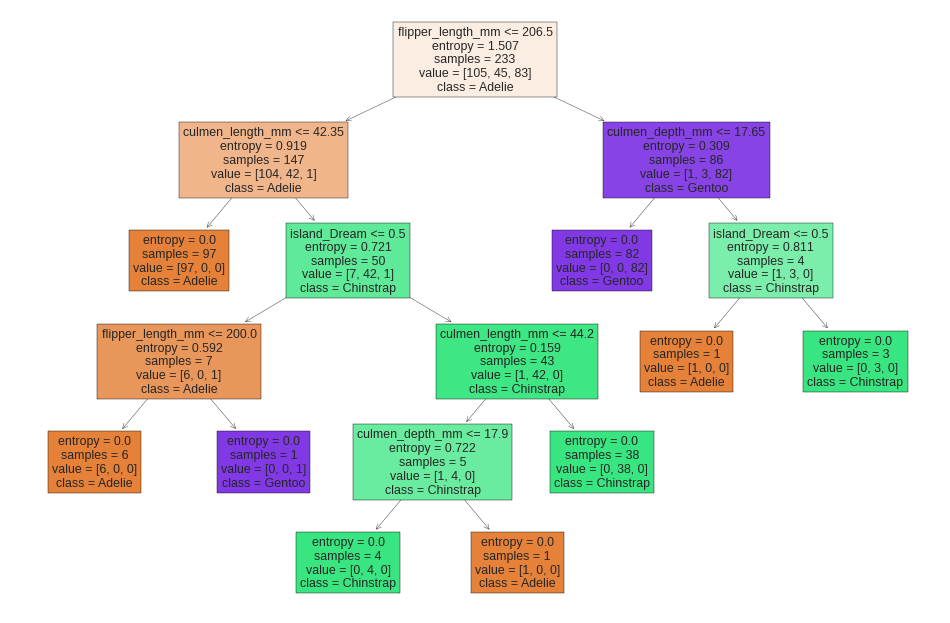

In [69]:
report_model(entropy_tree)

## Max_features, Splitter

In [74]:
tree = DecisionTreeClassifier(splitter = "best", max_features=2)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_features=2)

* splitter='best' dedigimizde best feature i aliyor, asagida report modelde train sette hepsini bildigini, testte ise 3 tane hata old nu goruyoruz matris sistemine bakarak. 
* Normalde train datasinda %100 dogru tahmin bize overfitting old nu dusundurur fakat test datasinin sonuclarina baktigimizda bir uyum old nu goruyoruz. Buna kotu diyemeyiz, burada guzel bir uyum soz konusu. O yuzden burada overfitting var diyemeyiz. Fakat test datasi tahminleri daha dusuk yuzdeli olsaydi burada overfitting var diyecektik. %95 alti gorursen sorun old nu dusun.
* mesela best yerine 'random' diyebilirdik splitter olarak. 



Test Set
[[40  0  1]
 [ 2 20  1]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       1.00      0.87      0.93        23
      Gentoo       0.95      1.00      0.97        37

    accuracy                           0.96       101
   macro avg       0.97      0.95      0.96       101
weighted avg       0.96      0.96      0.96       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



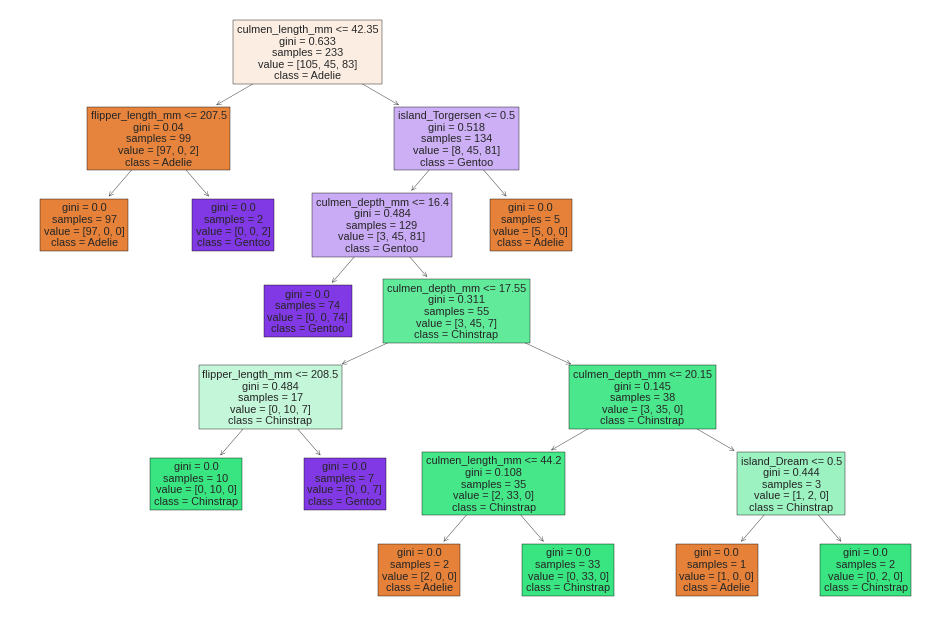

In [75]:
report_model(tree)

## Find Best Parameters

Best parametreleri her zaman old gibi grid search ile buluyoruz. 

In [77]:
np.log2(9)

3.169925001442312

9 feature im old icin log2 tabaninda 9'u np sayesinde hesaplattim asagida kullanacagim degeri gormek icin

In [76]:
from sklearn.model_selection import GridSearchCV

In [78]:
model = DecisionTreeClassifier(random_state=101)

In [80]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

# hyperparametreleri gridSearc e verip skorlara bakarızbiraz uzun sürer
# max_depth hard , splitter soft budama yapar.
# randomize search cv kullanırsan GridSearchCV random olarak yapar daha az işlem yapabilir. 


* max_features='auto' dersem feature sayimin karekokunu aliyor, log2 dersem de log2 tabaninda aldigi score u kullaniyor, bunlari 'string' ya da 'split' olarak kullaniyor dedi tam anlayamadim buna bi bakarsin
* parametreleri arttirabiliriz fakat data sayisinin fazla old yerlerde modelin maaliyetini arttirir. O yuzden max_depth ile deneme yanilma yoluyla bazi seylere onden bakilmasinda yarar var. 
* max_depth hard budama yapar diyoruz cunku lasso gibi davranir, onemsiz olan feature lari atar, kullanmaz. 2 katmana indir dersek mesela, digerlerinin hicbirini onemsemez, 2 katmanda bitirir orayi. Hata oranlari da ona oranla artar tabi.
* splitter ve diger hyperparameterlar soft dedigimiz daha ince bir ayardir. 

# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [81]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [82]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [83]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [84]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

